<a href="https://colab.research.google.com/github/Samarth1302/Reddit_Hyperlink_Analysis/blob/main/Reddit_Hyperlinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from operator import itemgetter
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/SNA_Project/data.xlsx", sheet_name=0)
st1=pd.read_excel("/content/drive/MyDrive/SNA_Project/data.xlsx", sheet_name=1)
st2=pd.read_excel("/content/drive/MyDrive/SNA_Project/data.xlsx", sheet_name=2)
st3=pd.read_excel("/content/drive/MyDrive/SNA_Project/data.xlsx", sheet_name=3)

## Full Data

In [ ]:
dfe = dict()
for row in range(0,df.shape[0]):
  if not df.iloc[row].Source in dfe:
    dfe[df.iloc[row].Source]=df.iloc[row].Edge_Weight
  else:
    dfe[df.iloc[row].Source]+=df.iloc[row].Edge_Weight

In [ ]:
rte =sorted(dfe.items(), key=lambda x: x[1], reverse=True)
print(rte)

In [ ]:
map=dict()
for i in range(0,len(rte)):
  if not math.floor(rte[i][1]/1000)*1000 in map:
    map[math.floor(rte[i][1]/1000)*1000]=1
  else:
    map[math.floor(rte[i][1]/1000)*1000]+=1
print(map)

{14000: 1, 9000: 2, 5000: 2, 4000: 3, 3000: 1, 2000: 6, 1000: 33, 0: 54479, -1000: 1336}


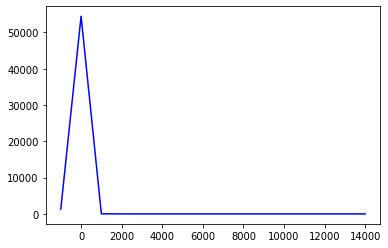

In [ ]:
plt.plot(map.keys(), map.values(),10.0,color='b')

## Sheet-1

In [ ]:
sv1 = dict()
for row in range(0,st1.shape[0]):
  if not st1.iloc[row].Source in sv1:
    sv1[st1.iloc[row].Source]=st1.iloc[row].Edge_Weight
  else:
    sv1[st1.iloc[row].Source]+=st1.iloc[row].Edge_Weight

In [ ]:
SV=sorted(sv1.items(), key=lambda x: x[1], reverse=True)
print(SV)

In [ ]:
map=dict()
for i in range(0,len(SV)):
  if not math.floor(SV[i][1]/10)*10 in map:
    map[math.floor(SV[i][1]/10)*10]=1
  else:
    map[math.floor(SV[i][1]/10)*10]+=1
print(map)

{6270: 1, 4450: 1, 3580: 1, 2070: 1, 1910: 1, 1550: 1, 1360: 1, 1060: 1, 1020: 1, 1000: 1, 950: 1, 930: 1, 920: 3, 890: 1, 870: 1, 790: 1, 770: 1, 690: 1, 620: 2, 610: 2, 600: 1, 590: 1, 580: 1, 560: 1, 550: 2, 540: 1, 510: 1, 470: 1, 460: 1, 450: 2, 440: 3, 430: 3, 420: 1, 390: 4, 380: 4, 370: 2, 360: 2, 350: 4, 340: 2, 330: 5, 310: 1, 300: 2, 290: 2, 280: 3, 270: 7, 260: 3, 250: 2, 240: 5, 230: 4, 220: 7, 210: 12, 200: 7, 190: 8, 180: 12, 170: 15, 160: 15, 150: 14, 140: 27, 130: 24, 120: 27, 110: 33, 100: 39, 90: 60, 80: 60, 70: 92, 60: 103, 50: 132, 40: 209, 30: 355, 20: 633, 10: 1602, 0: 21018, -10: 541, -20: 1, -30: 1, -70: 1}


In [ ]:
neg=dict()
for i in range(0,len(SV)):
  if SV[i][1]<0:
    if not math.floor(SV[i][1]/10)*10 in neg:
      neg[math.floor(SV[i][1]/10)*10]=1
    else:
      neg[math.floor(SV[i][1]/10)*10]+=1

In [ ]:
print(neg)

{-10: 541, -20: 1, -30: 1, -70: 1}


<BarContainer object of 4 artists>

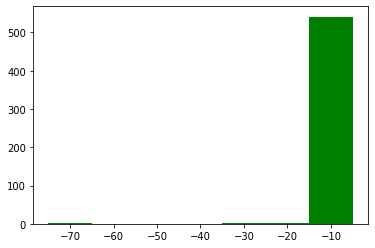

In [ ]:
plt.bar(neg.keys(), neg.values(),10.0,color='g')

# Sheet-2

In [ ]:
sv2 = dict()
for row in range(0,st2.shape[0]):
  if not st2.iloc[row].Source in sv2:
    sv2[st2.iloc[row].Source]=st2.iloc[row].Edge_Weight
  else:
    sv2[st2.iloc[row].Source]+=st2.iloc[row].Edge_Weight

In [ ]:
SV=sorted(sv2.items(), key=lambda x: x[1], reverse=True)
print(SV)

In [ ]:
map=dict()
for i in range(0,len(SV)):
  if not math.floor(SV[i][1]/10)*10 in map:
    map[math.floor(SV[i][1]/10)*10]=1
  else:
    map[math.floor(SV[i][1]/10)*10]+=1
print(map)

{4420: 1, 3270: 1, 3240: 1, 2040: 1, 1760: 1, 1710: 1, 1570: 1, 1500: 1, 1090: 1, 990: 1, 910: 1, 830: 1, 750: 2, 710: 1, 680: 1, 660: 1, 630: 2, 620: 1, 600: 1, 590: 1, 570: 1, 550: 1, 520: 2, 490: 1, 480: 2, 470: 1, 460: 1, 440: 1, 430: 1, 420: 1, 400: 3, 390: 1, 380: 2, 370: 2, 360: 2, 350: 2, 340: 3, 330: 1, 320: 1, 310: 7, 300: 6, 290: 6, 280: 5, 270: 6, 260: 3, 250: 4, 240: 5, 230: 5, 220: 4, 210: 13, 200: 7, 190: 8, 180: 13, 170: 11, 160: 18, 150: 25, 140: 19, 130: 10, 120: 33, 110: 38, 100: 41, 90: 57, 80: 56, 70: 83, 60: 99, 50: 134, 40: 209, 30: 363, 20: 643, 10: 1763, 0: 24393, -10: 632, -20: 2, -30: 2}


In [ ]:
neg2=dict()
for i in range(0,len(SV)):
  if SV[i][1]<0:
    if not math.floor(SV[i][1]/10)*10 in neg2:
      neg2[math.floor(SV[i][1]/10)*10]=1
    else:
      neg2[math.floor(SV[i][1]/10)*10]+=1

In [ ]:
print(neg2)

{-10: 632, -20: 2, -30: 2}


<BarContainer object of 3 artists>

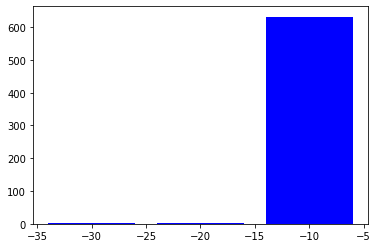

In [ ]:
plt.bar(neg2.keys(), neg2.values(),8.0,color='b')

# Sheet-3

In [ ]:
sv3 = dict()
for row in range(0,st3.shape[0]):
  if not st3.iloc[row].Source in sv3:
    sv3[st3.iloc[row].Source]=st3.iloc[row].Edge_Weight
  else:
    sv3[st3.iloc[row].Source]+=st3.iloc[row].Edge_Weight

In [ ]:
SV=sorted(sv3.items(), key=lambda x: x[1], reverse=True)
print(SV)

In [ ]:
map=dict()
for i in range(0,len(SV)):
  if not math.floor(SV[i][1]/10)*10 in map:
    map[math.floor(SV[i][1]/10)*10]=1
  else:
    map[math.floor(SV[i][1]/10)*10]+=1
print(map)

{3540: 1, 2630: 1, 1960: 1, 1800: 1, 1690: 1, 1600: 1, 1590: 1, 1430: 1, 1350: 1, 1210: 1, 1150: 1, 920: 1, 880: 1, 820: 1, 810: 1, 730: 2, 700: 1, 690: 1, 590: 2, 570: 1, 560: 1, 540: 2, 530: 2, 520: 1, 470: 3, 460: 1, 450: 1, 430: 2, 420: 1, 410: 2, 400: 2, 390: 2, 380: 1, 370: 2, 360: 2, 350: 3, 340: 4, 330: 2, 320: 1, 310: 3, 300: 1, 290: 2, 280: 3, 270: 6, 260: 8, 250: 6, 240: 7, 230: 8, 220: 4, 210: 7, 200: 10, 190: 13, 180: 20, 170: 11, 160: 13, 150: 17, 140: 23, 130: 30, 120: 22, 110: 34, 100: 41, 90: 52, 80: 54, 70: 81, 60: 94, 50: 165, 40: 187, 30: 362, 20: 672, 10: 1710, 0: 23946, -10: 687, -20: 2, -40: 1}


In [ ]:
neg3=dict()
for i in range(0,len(SV)):
  if SV[i][1]<0:
    if not math.floor(SV[i][1]/10)*10 in neg3:
      neg3[math.floor(SV[i][1]/10)*10]=1
    else:
      neg3[math.floor(SV[i][1]/10)*10]+=1

In [ ]:
print(neg3)

{-10: 687, -20: 2, -40: 1}


<BarContainer object of 3 artists>

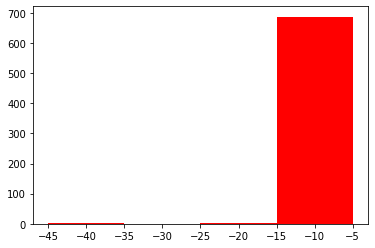

In [ ]:
plt.bar(neg3.keys(), neg3.values(),10.0,color='r')

# Inter-Community

In [ ]:
# srcList = set()
# for i in range(0,df.shape[0]):
#   srcList.add(df.iloc[i].Source)
# print(srcList)


In [ ]:
dfx=df.drop(['POST_ID', 'Timeset'], axis=1)
res = dfx.groupby(by=['Source', 'Target'])['Edge_Weight'].agg(
    pos_edges = lambda x: sum(x == 1),
    neg_edges = lambda x: sum(x == -1)
).reset_index()
print(res)

In [ ]:
res_df = pd.DataFrame(res)

In [ ]:
res_df['Sign']=0

In [ ]:
for row in range(0,res_df.shape[0]):
  val=res_df.iloc[row].pos_edges + res_df.iloc[row].neg_edges
  val=val*2/3
  if(res_df.iloc[row].pos_edges>val):
    res_df.loc[row,'Sign']=1
  elif(res_df.iloc[row].neg_edges>val):
    res_df.loc[row,'Sign']=-1
  else:
    res_df.loc[row,'Sign']=0

print(res_df)

In [ ]:
value = {-1:0,0:0,1:0}

In [ ]:
for row in range(0,res_df.shape[0]):
  value[res_df.iloc[row].Sign]+=1
print(value) 

{-1: 18327, 0: 11277, 1: 310040}


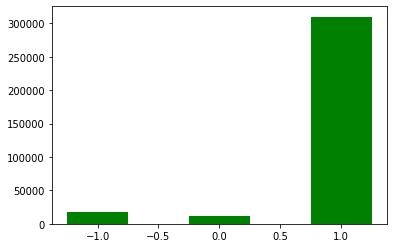

In [ ]:
plt.bar(value.keys(), value.values(),0.5,color='g')
plt.show()

In [ ]:
# Gn= nx.DiGraph()
# Gn = nx.from_pandas_edgelist(res_df, source="Source", target="Target", edge_attr=["pos_edges","neg_edges"])
# nx.draw(Gn, with_labels=True)
# plt.show()

In [ ]:
# res_df.to_excel('filename.xlsx', sheet_name = 'New_sheet')

In [ ]:
# files.download('filename.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Graph metrics

In [ ]:
G = nx.MultiDiGraph()
G = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr=["Edge_Weight","Timeset"])

In [ ]:
# nx.draw(G, with_labels=True)
# plt.show()

In [ ]:
degree_distribution = dict(G.degree())
avg_clustering_coefficient = nx.average_clustering(G,weight="Edge_Weight")
transitivity = nx.transitivity(G)
assortativity = nx.degree_assortativity_coefficient(G,weight="Edge_Weight")

In [ ]:
print("Degree distribution:", degree_distribution)
print("Weighted Average clustering coefficient:", avg_clustering_coefficient)
print("Transitivity:", transitivity)
print("Weighted Assortativity:", assortativity)

In [ ]:
Degree = sorted(degree_distribution.items(), key=lambda x: x[1], reverse=True)
print(Degree)

In [ ]:
pr = nx.pagerank(G,alpha=0.85,tol=1e-06)
print(pr)

In [ ]:
sorted_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)
print(sorted_pr)

In [ ]:
top = sorted_pr[:5]
name = [t[0] for t in top]
score = [t[1] for t in top]
plt.bar(name, score)
plt.xlabel('SubReddit ID')
plt.ylabel('PageRank Score')
plt.title('Top 5 Nodes by PageRank Score')
plt.show()

# Extra

In [ ]:
# signed_betweenness = nx.betweenness_centrality(G, weight="Edge_Weight")
# print(signed_betweenness)

In [ ]:
# signed_modularity = nx.algorithms.community.modularity(G, weight="Edge_Weight")
# print(signed_modularity) (!!need to build communities then use this!!)

In [ ]:
# hubs, authorities = nx.hits(G,max_iter=100,tol=1e-04,normalized = False)
# print("Hub Scores: ", hubs)
# print("Authority Scores: ", authorities)

In [ ]:
# Hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
# print(Hubs)

In [ ]:
# Authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
# print(Authorities)